In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from lmfit.models import PolynomialModel
import math

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_dreported from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_dreported
0       2016-03-31    2016-03-31
1       2016-03-31    2016-04-01
2       2016-04-01    2016-04-01
3       2016-03-25    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
20      2016-03-23    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
26      2016-03-30    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      20

In [3]:
df_inc = df.copy()
df_inc = df_inc[df_inc.inc_dincident > '2016-03-31']
df_inc = df_inc[df_inc.inc_dincident < '2019-10-01']
print(df_inc)

     inc_dincident inc_dreported
2       2016-04-01    2016-04-01
4       2016-04-02    2016-04-02
5       2016-04-01    2016-04-02
6       2016-04-01    2016-04-02
7       2016-04-02    2016-04-02
8       2016-04-02    2016-04-02
9       2016-04-03    2016-04-03
10      2016-04-03    2016-04-03
11      2016-04-02    2016-04-04
12      2016-04-02    2016-04-04
13      2016-04-02    2016-04-04
14      2016-04-02    2016-04-04
15      2016-04-02    2016-04-04
16      2016-04-04    2016-04-04
17      2016-04-02    2016-04-04
18      2016-04-04    2016-04-04
19      2016-04-02    2016-04-04
21      2016-04-02    2016-04-04
22      2016-04-02    2016-04-04
23      2016-04-04    2016-04-04
24      2016-04-04    2016-04-05
25      2016-04-05    2016-04-05
27      2016-04-06    2016-04-06
28      2016-04-06    2016-04-06
29      2016-04-06    2016-04-06
30      2016-04-06    2016-04-06
31      2016-04-06    2016-04-06
32      2016-04-06    2016-04-06
33      2016-04-07    2016-04-07
34      20

In [4]:
df_inc['month'] = df_inc['inc_dincident'].dt.month
print(df_inc)

     inc_dincident inc_dreported  month
2       2016-04-01    2016-04-01      4
4       2016-04-02    2016-04-02      4
5       2016-04-01    2016-04-02      4
6       2016-04-01    2016-04-02      4
7       2016-04-02    2016-04-02      4
8       2016-04-02    2016-04-02      4
9       2016-04-03    2016-04-03      4
10      2016-04-03    2016-04-03      4
11      2016-04-02    2016-04-04      4
12      2016-04-02    2016-04-04      4
13      2016-04-02    2016-04-04      4
14      2016-04-02    2016-04-04      4
15      2016-04-02    2016-04-04      4
16      2016-04-04    2016-04-04      4
17      2016-04-02    2016-04-04      4
18      2016-04-04    2016-04-04      4
19      2016-04-02    2016-04-04      4
21      2016-04-02    2016-04-04      4
22      2016-04-02    2016-04-04      4
23      2016-04-04    2016-04-04      4
24      2016-04-04    2016-04-05      4
25      2016-04-05    2016-04-05      4
27      2016-04-06    2016-04-06      4
28      2016-04-06    2016-04-06      4


In [5]:
month_occurences = np.array([3,3,3,4,4,4,4,4,4,3,3,3])
print(month_occurences)

[3 3 3 4 4 4 4 4 4 3 3 3]


In [6]:
days_in_month = np.ones(12)*31
days_in_month[1] = 28
days_in_month[3] = 30
days_in_month[5] = 30
days_in_month[8] = 30
days_in_month[10] = 30
print(days_in_month)

[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]


In [7]:
division_factor = month_occurences*days_in_month
print(division_factor)

[ 93.  84.  93. 120. 124. 120. 124. 124. 120.  93.  90.  93.]


(0.0, 1.0, 0.0, 1.0)

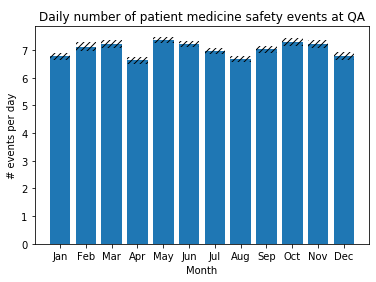

In [8]:
bins = [i+0.5 for i in range(13)]
data_x = [i+1 for i in range(12)]
data_y_tot,_ = np.histogram(df_inc.month.values, bins=bins)
data_y = data_y_tot/division_factor
data_y_err = np.sqrt(data_y_tot)/division_factor
plt.bar(data_x,data_y,label='Data')
plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
#plt.legend(frameon=False)
ax = plt.gca()
locs, labels = plt.xticks()
plt.xticks(data_x,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month');
plt.ylabel('# events per day')
plt.title('Daily number of patient medicine safety events at QA')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
#ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

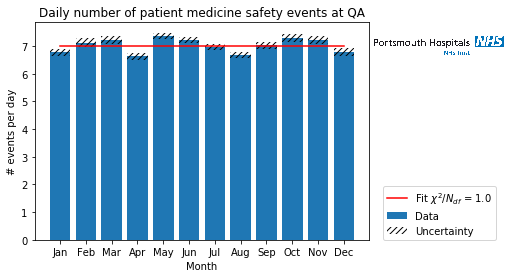

In [34]:
k = 0
reduced_chi_sq = 3
while reduced_chi_sq > 2 or reduced_chi_sq < 0.5:
    # data fit
    polynomial_mod = PolynomialModel(k)
    pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0])
    model = polynomial_mod
    out = model.fit(data_y, pars, x=data_x, weights=1/data_y_err)

    plt.bar(data_x,data_y,label='Data')
    plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
    plt.plot(data_x, out.best_fit, '-r', label='Fit '+r'$\chi^2/N_{df}$ = '+str(round(out.redchi,1)))
    plt.legend(loc=(1.04,0))
    ax = plt.gca()
    locs, labels = plt.xticks()
    plt.xticks(data_x,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.xlabel('Month');
    plt.ylabel('# events per day')
    plt.title('Daily number of patient medicine safety events at QA')
    img = plt.imread("nhsportsmouth.png");
    ax = plt.axes([0.91,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
    ax.imshow(img)
    ax.axis('off')  # get rid of the ticks and ticklabels
    
    reduced_chi_sq = out.redchi
    k+=1

In [35]:
df_rep = df.copy()
df_rep = df_rep[df_rep.inc_dreported > '2016-03-31']
df_rep = df_rep[df_rep.inc_dreported < '2019-10-01']

In [36]:
df_rep['month'] = df_rep['inc_dreported'].dt.month

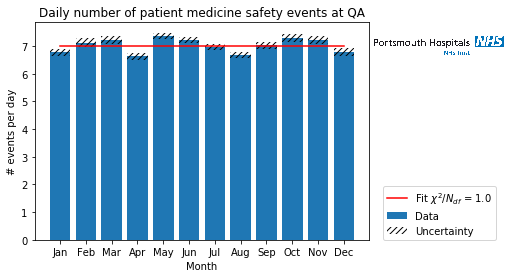

In [37]:
k = 0
reduced_chi_sq = 3
while reduced_chi_sq > 2 or reduced_chi_sq < 0.5:
    # data fit
    polynomial_mod = PolynomialModel(k)
    pars = polynomial_mod.guess(data_y, x=data_x, c0=data_y[0])
    model = polynomial_mod
    out = model.fit(data_y, pars, x=data_x, weights=1/data_y_err)

    plt.bar(data_x,data_y,label='Data')
    plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
    plt.plot(data_x, out.best_fit, '-r', label='Fit '+r'$\chi^2/N_{df}$ = '+str(round(out.redchi,1)))
    plt.legend(loc=(1.04,0))
    ax = plt.gca()
    locs, labels = plt.xticks()
    plt.xticks(data_x,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.xlabel('Month');
    plt.ylabel('# events per day')
    plt.title('Daily number of patient medicine safety events at QA')
    img = plt.imread("nhsportsmouth.png");
    ax = plt.axes([0.91,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
    ax.imshow(img)
    ax.axis('off')  # get rid of the ticks and ticklabels
    
    reduced_chi_sq = out.redchi
    k+=1

In [41]:
# Import figure from bokeh.plotting
from bokeh.plotting import figure

# Import output_file and show from bokeh.io
from bokeh.io import show, output_notebook

from bokeh.models import ColumnDataSource, Band, Legend, LegendItem, Span, HoverTool


groups= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
counts = data_y
error = data_y_err
upper = [x+e for x,e in zip(counts, error) ]
lower = [x-e for x,e in zip(counts, error) ]
color = ['blue','blue','green','green','green','red','red','red','yellow','yellow','yellow','blue']

source = ColumnDataSource(data=dict(groups=groups, counts=counts, upper=upper, lower=lower, color=color))

p = figure(x_range=groups, plot_height=450, title="Daily medicine patient safety events at QA", y_range=(0,math.ceil(max(counts))-0.2),
          x_axis_label='Month',y_axis_label='events per day',
          tools='pan,box_select,box_zoom,wheel_zoom,save,reset,help')

p.vbar(x='groups', top='counts', width=0.9, source=source, 
       line_color='white', color='color',nonselection_alpha=0, 
         hover_fill_color='black')
r_err = p.vbar(x='groups', bottom='lower', top='upper', width=0.9, source=source, fill_color='grey', fill_alpha=0.9,
      line_color='white')
r_linear = p.line(groups,out.best_fit,line_color='purple')

p.xgrid.grid_line_color = None

legend = Legend(items=[
    LegendItem(label="winter", renderers=[p.vbar(x=0, top=0, width=0.9, color='blue')]),
    LegendItem(label="spring", renderers=[p.vbar(x=0, top=0, width=0.9, color='green')]),
    LegendItem(label="summer", renderers=[p.vbar(x=0, top=0, width=0.9, color='red')]),
    LegendItem(label="autumn", renderers=[p.vbar(x=0, top=0, width=0.9, color='yellow')]),
    LegendItem(label="uncertainty", renderers=[r_err]),
    LegendItem(label='fit χ²/Nᵈᶠ = '+str(round(out.redchi,1)), renderers=[r_linear]),
])
p.add_layout(legend)
p.legend.location = "bottom_right"

# Create a HoverTool: hover
hover = HoverTool(tooltips=None,mode='hline')

# Add the hover tool to the figure p
p.add_tools(hover)

output_notebook()


Loading BokehJS ...

In [42]:
show(p)